In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sp

In [3]:
Dataset_raw = pd.read_csv('Final_Data.csv')

In [4]:
Dataset_df = Dataset_raw[['Tin','FR','T1','T2','Qcool','RR','B','QR','Qc','FV','FL_Top','FL_Bot','T5','T10','T15','T20','T25','XME_V','XME_D','XW_B']]

In [5]:
Dataset_df

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
0,230.3,5.01,46.9,47.3,-3408.57514,1.37,99.750,1983.48465,-2488.67285,1.138522,98.280150,64.914011,66.257027,69.541474,75.486573,76.672814,87.675879,0.494652,0.995920,0.993144
1,230.1,4.99,47.1,47.1,-3361.39142,1.35,99.780,1915.60558,-2468.84306,1.115023,98.296869,64.923862,66.300389,69.675587,75.673650,76.848653,87.632430,0.490251,0.995804,0.992883
2,230.2,4.96,47.0,47.3,-3381.69240,1.32,99.750,1904.54513,-2435.46282,1.142253,98.255017,64.936598,66.353072,69.789407,75.703274,76.876799,87.627191,0.494556,0.995726,0.992843
3,230.1,4.96,46.9,47.2,-3386.32257,1.34,99.750,1931.66436,-2457.12858,1.138654,98.259095,64.926414,66.312165,69.688798,75.625758,76.797898,87.520617,0.492412,0.995789,0.992799
4,230.1,4.96,47.0,47.0,-3373.49223,1.32,99.750,1897.66426,-2437.68179,1.116335,98.291160,64.936477,66.353103,69.794478,75.723243,76.896943,87.658595,0.488026,0.995669,0.992860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,238.7,4.66,57.0,43.5,-2778.68173,2.57,101.975,2466.88934,-3715.32348,0.543364,96.821734,64.859134,65.779825,67.830652,74.295629,75.245604,80.543126,0.417377,0.996010,0.973971
15933,238.4,4.69,57.3,43.8,-2733.54212,2.59,101.950,2443.71320,-3737.10741,0.545191,96.911121,64.859891,65.779871,67.832493,74.344810,75.296630,80.659625,0.423115,0.996075,0.974561
15934,238.7,4.66,57.4,44.2,-2741.43180,2.60,101.930,2457.44303,-3746.68840,0.564553,96.964680,64.859930,65.779101,67.825150,74.321131,75.275515,80.697085,0.430865,0.996145,0.974983
15935,239.1,4.65,57.9,44.2,-2719.76161,2.56,101.955,2386.51443,-3701.16486,0.549742,96.874197,64.860486,65.784184,67.867261,74.457235,75.406400,80.734354,0.430865,0.996151,0.974436


In [6]:
Dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tin     15937 non-null  float64
 1   FR      15937 non-null  float64
 2   T1      15937 non-null  float64
 3   T2      15937 non-null  float64
 4   Qcool   15937 non-null  float64
 5   RR      15937 non-null  float64
 6   B       15937 non-null  float64
 7   QR      15937 non-null  float64
 8   Qc      15937 non-null  float64
 9   FV      15937 non-null  float64
 10  FL_Top  15937 non-null  float64
 11  FL_Bot  15937 non-null  float64
 12  T5      15937 non-null  float64
 13  T10     15937 non-null  float64
 14  T15     15937 non-null  float64
 15  T20     15937 non-null  float64
 16  T25     15937 non-null  float64
 17  XME_V   15937 non-null  float64
 18  XME_D   15937 non-null  float64
 19  XW_B    15937 non-null  float64
dtypes: float64(20)
memory usage: 2.4 MB


In [7]:
Dataset_df.isnull().sum()

Tin       0
FR        0
T1        0
T2        0
Qcool     0
RR        0
B         0
QR        0
Qc        0
FV        0
FL_Top    0
FL_Bot    0
T5        0
T10       0
T15       0
T20       0
T25       0
XME_V     0
XME_D     0
XW_B      0
dtype: int64

In [8]:
Dataset_df.corr()

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
Tin,1.000000,0.039706,0.209322,0.203192,-0.628540,0.284445,0.629407,0.445869,-0.268878,-0.040643,-0.495622,0.109349,0.037913,-0.133262,-0.405723,-0.419774,-0.560397,0.202180,-0.032873,-0.625770
FR,0.039706,1.000000,0.240104,0.164412,0.096964,0.064717,0.064214,0.015480,-0.063329,-0.203784,0.055814,-0.055583,-0.065798,-0.093981,-0.036557,-0.032413,0.008726,0.168936,0.131695,0.016157
T1,0.209322,0.240104,1.000000,-0.043858,0.594513,0.032070,0.218847,-0.225116,-0.035187,-0.772504,0.153794,-0.051672,-0.056053,-0.032645,0.172358,0.166387,0.075788,-0.042034,0.111454,-0.054221
T2,0.203192,0.164412,-0.043858,1.000000,-0.211348,0.090470,0.180879,0.139232,-0.063005,0.638842,-0.342302,-0.026568,-0.023783,-0.064172,-0.132263,-0.136423,-0.181497,0.998340,0.268091,-0.176958
Qcool,-0.628540,0.096964,0.594513,-0.211348,1.000000,-0.164758,-0.302619,-0.510129,0.150621,-0.553682,0.469070,-0.139368,-0.104215,0.043762,0.433230,0.439612,0.479296,-0.210014,0.107466,0.418070
RR,0.284445,0.064717,0.032070,0.090470,-0.164758,1.000000,0.710785,0.930474,-0.999214,0.070583,-0.629261,-0.242041,-0.343317,-0.740104,-0.853562,-0.850312,-0.779425,0.101297,0.304498,-0.647466
B,0.629407,0.064214,0.218847,0.180879,-0.302619,0.710785,1.000000,0.701523,-0.693709,-0.031609,-0.824509,-0.073075,-0.177609,-0.503897,-0.672288,-0.694296,-0.895145,0.185930,0.159337,-0.954395
QR,0.445869,0.015480,-0.225116,0.139232,-0.510129,0.930474,0.701523,1.000000,-0.925544,0.280268,-0.707029,-0.169756,-0.271752,-0.666805,-0.906745,-0.905002,-0.842562,0.148428,0.225232,-0.693462
Qc,-0.268878,-0.063329,-0.035187,-0.063005,0.150621,-0.999214,-0.693709,-0.925544,1.000000,-0.051849,0.602009,0.243982,0.342538,0.739206,0.847416,0.843374,0.765035,-0.073999,-0.300595,0.628475
FV,-0.040643,-0.203784,-0.772504,0.638842,-0.553682,0.070583,-0.031609,0.280268,-0.051849,1.000000,-0.353312,0.003943,0.006223,-0.050224,-0.237251,-0.235541,-0.195540,0.640621,0.097092,-0.089216


<AxesSubplot:>

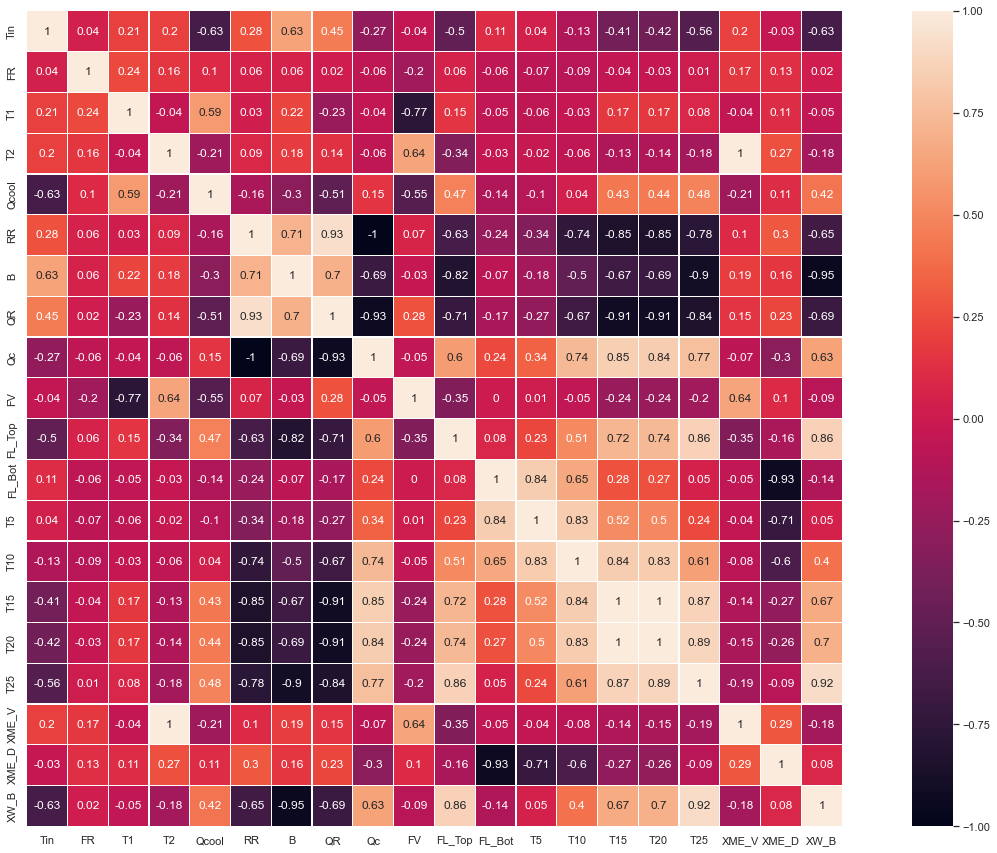

In [9]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(Dataset_df.corr().round(2), annot=True, linewidths=0.2, square=True)

In [10]:
Dataset_raw = np.array(Dataset_df)
Dataset = np.random.permutation(Dataset_raw)

X_train = Dataset[:12000,:9]
Y_train = Dataset[:12000,-3:]
X_test  = Dataset[12000:,:9]
Y_test  = Dataset[12000:,-3:]

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)
scaler_X_test = sp.StandardScaler().fit(X_test)
X_test_scl = scaler_X_test.transform(X_test)
scaler_Y_train = sp.StandardScaler().fit(Y_train)
Y_train_scl = scaler_Y_train.transform(Y_train)
scaler_Y_test = sp.StandardScaler().fit(Y_test)
Y_test_scl = scaler_Y_test.transform(Y_test)

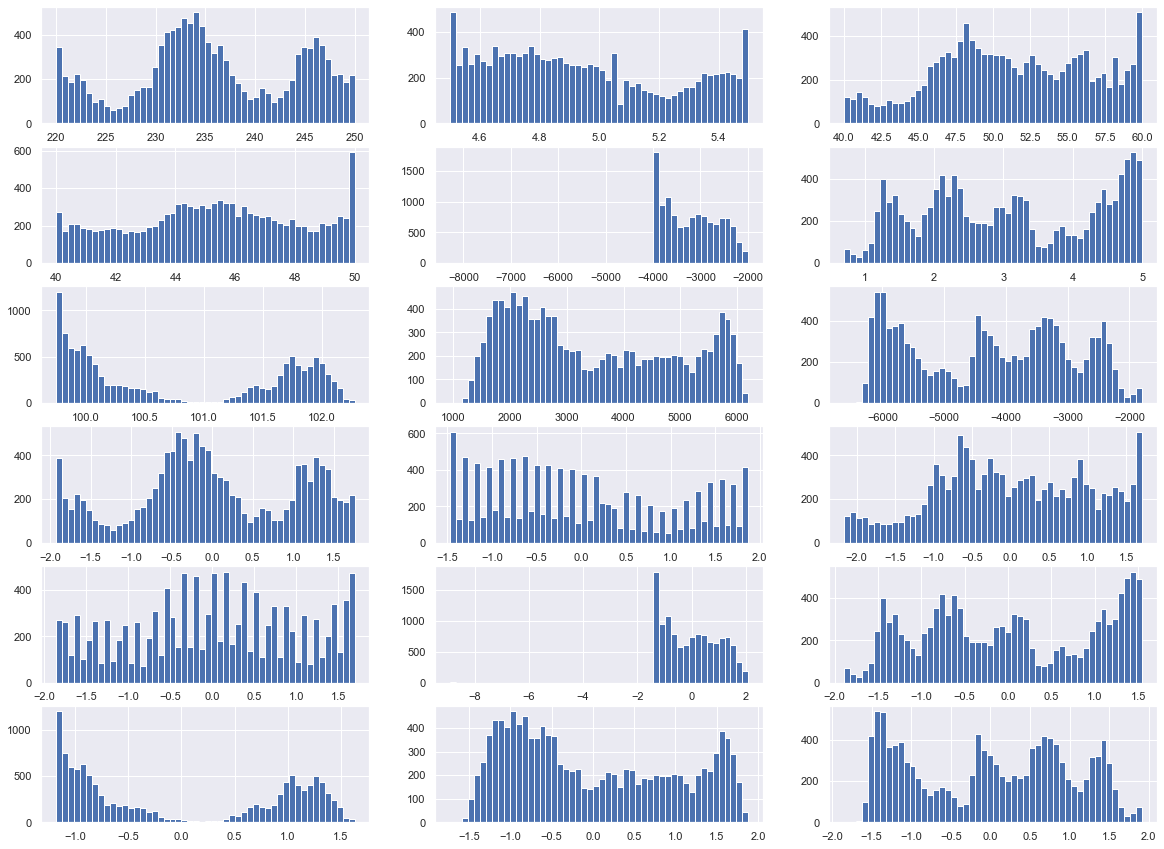

In [11]:
fig, ax = plt.subplots(6,3,figsize=(20,15))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.hist(X_train[:,i] , bins = 50)
    plt.subplot(6,3,i+10)
    plt.hist(X_train_scl[:,i] , bins = 50)

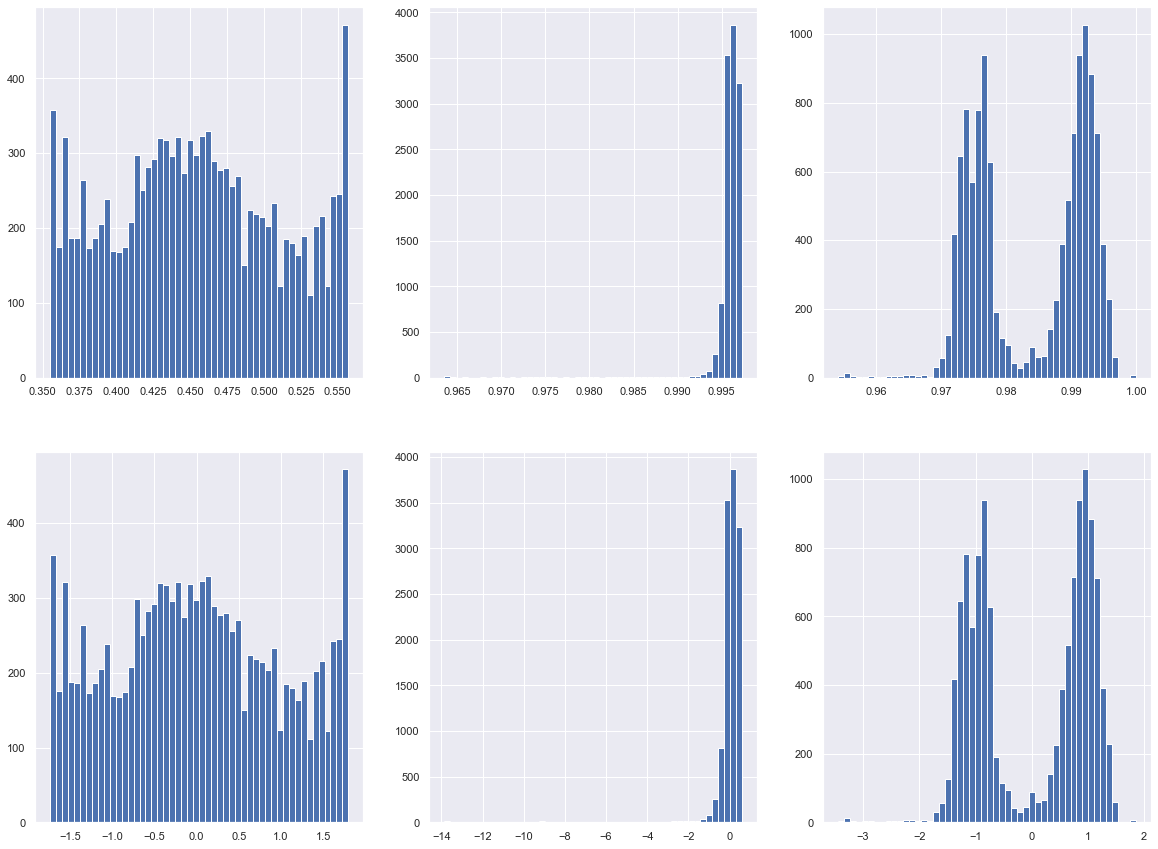

In [12]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(Y_train[:,i] , bins = 50)
    plt.subplot(2,3,i+4)
    plt.hist(Y_train_scl[:,i] , bins = 50)